In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
dfs = []
for file in glob.glob('eval/**/*.csv', recursive=True):
    setting = file.split('_')[-2]
    model = file.split('_')[-3].split('\\')[-1]
    dataset = file.split('\\')[1]
    df = pd.read_csv(file)
    df.columns = ['misc'] + df.columns[1:].tolist()
    df['setting'] = df.misc.apply(lambda x: 'baseline' if 'baseline' in x else setting)
    df['model'] = model
    df['dataset'] = dataset
    df['nb_queries'] = df.misc.apply(lambda x: np.nan if 'baseline' in x else int(x.split('_')[1]))
    df.drop(['misc'], axis=1, inplace=True)
    dfs.append(df)
    
df_eval = pd.concat(dfs)

In [3]:
df_baseline = df_eval[df_eval['setting']=='baseline'].drop_duplicates()
df_baseline

,precision,recall,fscore,set,setting,model,dataset,nb_queries
0,1.000000,1.000000,1.000000,train,baseline,spacy,fake-news,NaN
1,0.999973,0.999971,0.999972,test,baseline,spacy,fake-news,NaN
0,0.950028,0.941148,0.942555,train,baseline,wex,fake-news,NaN
1,0.952722,0.943523,0.945382,test,baseline,wex,fake-news,NaN
0,0.945859,0.842165,0.880575,train,baseline,spacy,hate-speech,NaN
1,0.967788,0.864989,0.904134,test,baseline,spacy,hate-speech,NaN
0,0.937474,0.861646,0.896004,train,baseline,wex,hate-speech,NaN
1,0.923284,0.867545,0.892636,test,baseline,wex,hate-speech,NaN
0,1.000000,1.000000,1.000000,train,baseline,spacy,spam,NaN
1,1.000000,1.000000,1.000000,test,baseline,spacy,spam,NaN


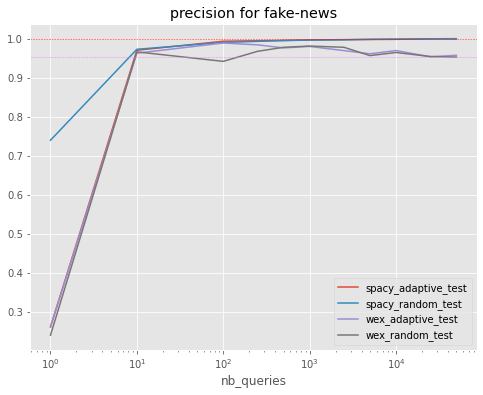

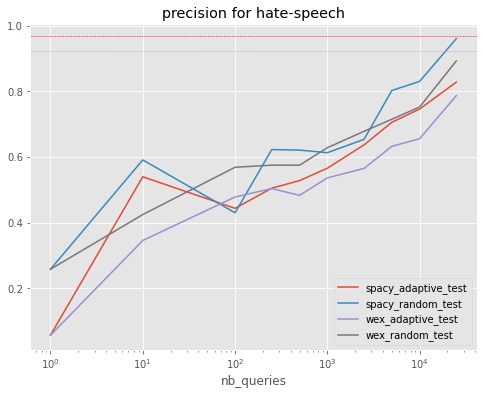

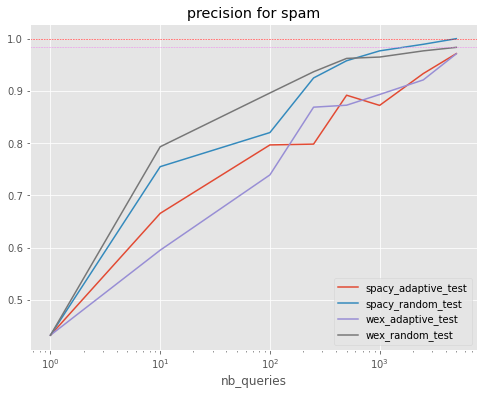

In [4]:
e_set = 'test'
measure = 'precision'
for use_case in df_eval.dataset.unique().tolist():
    df_uc = df_eval[df_eval.dataset==use_case]
    df_sc = df_uc[df_uc.setting != 'baseline']
    fig, ax = plt.subplots(figsize=(8,6))
    for label, df in df_sc.groupby('model'):
        for s_label, df_s in df.groupby('setting'):
            a=df_s[df_s.set==e_set]
            df_s[df_s.set==e_set].plot(kind='line', ax=ax, x='nb_queries', y=measure, label=label+'_'+s_label+'_test', logx=True)
    plt.legend()
    baseline_wex = df_uc.query(f"setting=='baseline' and model=='wex' and set=='{e_set}'").drop_duplicates()[measure].to_numpy()
    baseline_spacy = df_uc.query(f"setting=='baseline' and model=='spacy' and set=='{e_set}'").drop_duplicates()[measure].to_numpy()
    plt.axhline(y=baseline_wex, color='violet', linestyle='--', linewidth=.5)
    plt.axhline(y=baseline_spacy, color='red', linestyle='--', linewidth=.5)
    plt.title(measure + ' for ' + use_case)

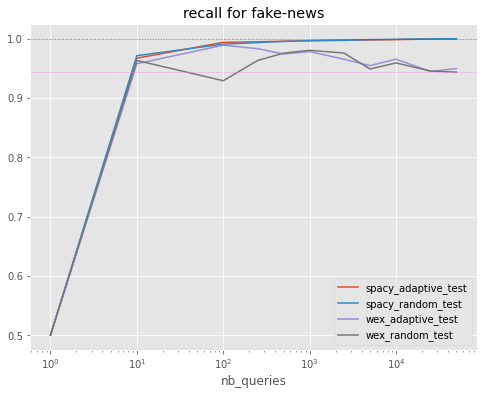

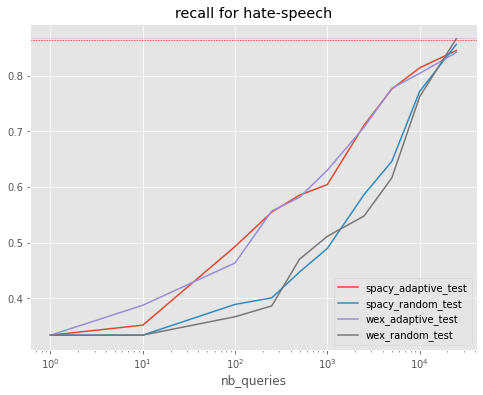

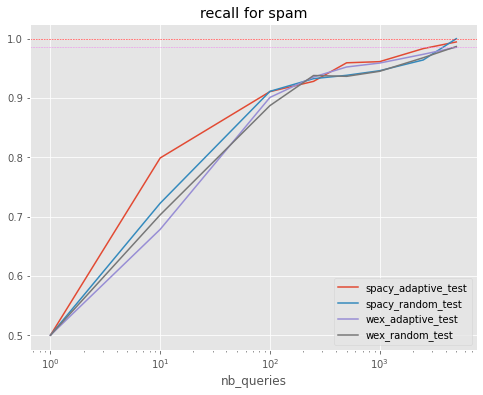

In [5]:
e_set = 'test'
measure = 'recall'
for use_case in df_eval.dataset.unique().tolist():
    df_uc = df_eval[df_eval.dataset==use_case]
    df_sc = df_uc[df_uc.setting != 'baseline']
    fig, ax = plt.subplots(figsize=(8,6))
    for label, df in df_sc.groupby('model'):
        for s_label, df_s in df.groupby('setting'):
            a=df_s[df_s.set==e_set]
            df_s[df_s.set==e_set].plot(kind='line', ax=ax, x='nb_queries', y=measure, label=label+'_'+s_label+'_test', logx=True)
            
    baseline_wex = df_uc.query(f"setting=='baseline' and model=='wex' and set=='{e_set}'").drop_duplicates()[measure].to_numpy()
    baseline_spacy = df_uc.query(f"setting=='baseline' and model=='spacy' and set=='{e_set}'").drop_duplicates()[measure].to_numpy()
    plt.axhline(y=baseline_wex, color='violet', linestyle='--', linewidth=.5)
    plt.axhline(y=baseline_spacy, color='red', linestyle='--', linewidth=.5)
    plt.legend()
    plt.title(measure + ' for ' + use_case)

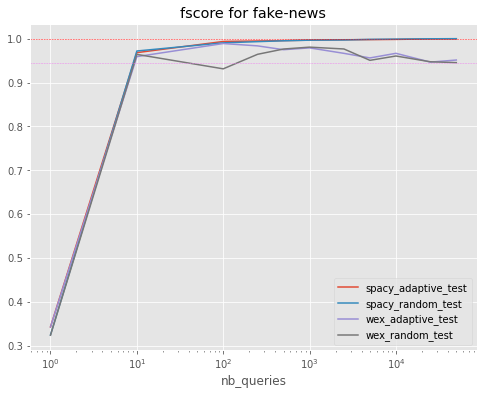

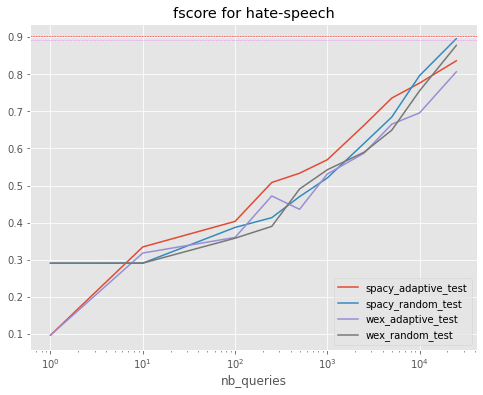

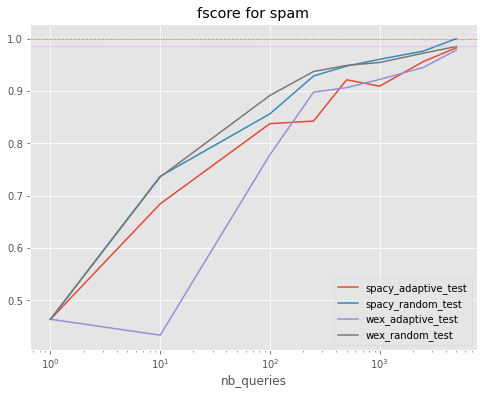

In [6]:
e_set = 'test'
measure = 'fscore'
for use_case in df_eval.dataset.unique().tolist():
    df_uc = df_eval[df_eval.dataset==use_case]
    df_sc = df_uc[df_uc.setting != 'baseline']
    fig, ax = plt.subplots(figsize=(8,6))
    for label, df in df_sc.groupby('model'):
        for s_label, df_s in df.groupby('setting'):
            a=df_s[df_s.set==e_set]
            df_s[df_s.set==e_set].plot(kind='line', ax=ax, x='nb_queries', y=measure, label=label+'_'+s_label+'_test', logx=True)
            
    baseline_wex = df_uc.query(f"setting=='baseline' and model=='wex' and set=='{e_set}'").drop_duplicates()[measure].to_numpy()
    baseline_spacy = df_uc.query(f"setting=='baseline' and model=='spacy' and set=='{e_set}'").drop_duplicates()[measure].to_numpy()
    plt.axhline(y=baseline_wex, color='violet', linestyle='--', linewidth=.5)
    plt.axhline(y=baseline_spacy, color='red', linestyle='--', linewidth=.5)
    plt.legend()
    plt.title(measure + ' for ' + use_case)

### Non log scale

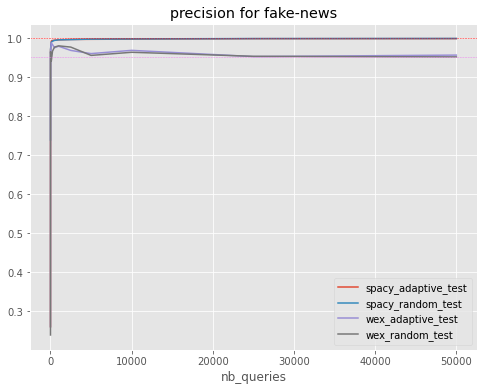

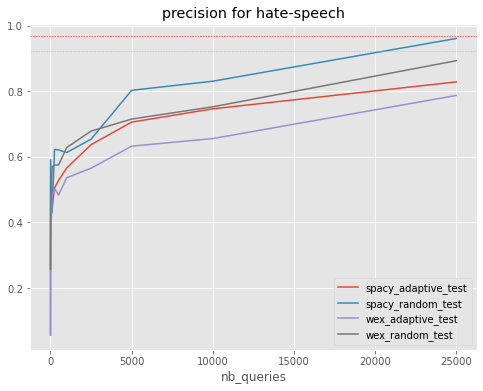

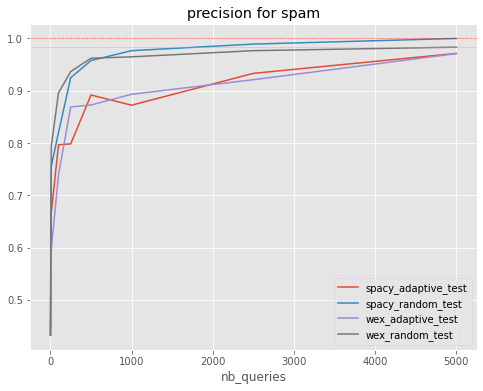

In [7]:
e_set = 'test'
measure = 'precision'
for use_case in df_eval.dataset.unique().tolist():
    df_uc = df_eval[df_eval.dataset==use_case]
    df_sc = df_uc[df_uc.setting != 'baseline']
    fig, ax = plt.subplots(figsize=(8,6))
    for label, df in df_sc.groupby('model'):
        for s_label, df_s in df.groupby('setting'):
            a=df_s[df_s.set==e_set]
            df_s[df_s.set==e_set].plot(kind='line', ax=ax, x='nb_queries', y=measure, label=label+'_'+s_label+'_test')
    plt.legend()
    baseline_wex = df_uc.query(f"setting=='baseline' and model=='wex' and set=='{e_set}'").drop_duplicates()[measure].to_numpy()
    baseline_spacy = df_uc.query(f"setting=='baseline' and model=='spacy' and set=='{e_set}'").drop_duplicates()[measure].to_numpy()
    plt.axhline(y=baseline_wex, color='violet', linestyle='--', linewidth=.5)
    plt.axhline(y=baseline_spacy, color='red', linestyle='--', linewidth=.5)
    plt.title(measure + ' for ' + use_case)

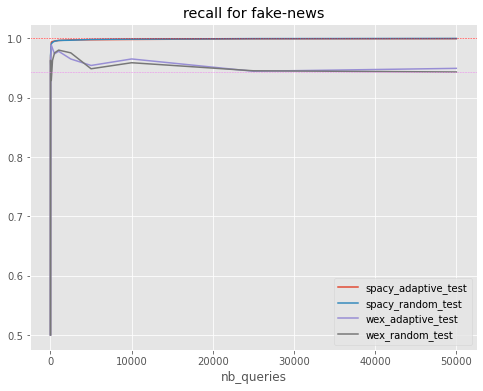

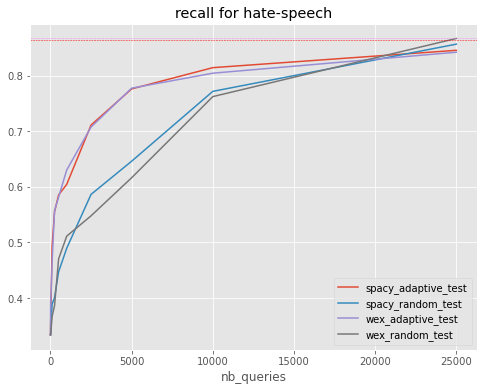

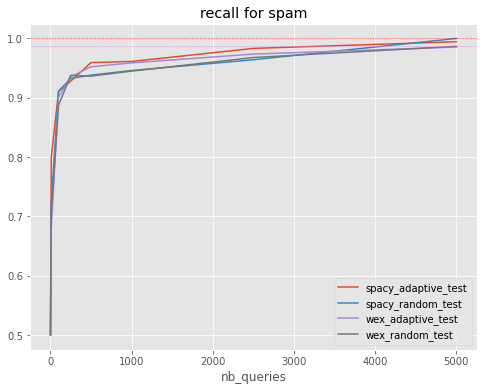

In [8]:
e_set = 'test'
measure = 'recall'
for use_case in df_eval.dataset.unique().tolist():
    df_uc = df_eval[df_eval.dataset==use_case]
    df_sc = df_uc[df_uc.setting != 'baseline']
    fig, ax = plt.subplots(figsize=(8,6))
    for label, df in df_sc.groupby('model'):
        for s_label, df_s in df.groupby('setting'):
            a=df_s[df_s.set==e_set]
            df_s[df_s.set==e_set].plot(kind='line', ax=ax, x='nb_queries', y=measure, label=label+'_'+s_label+'_test')
    plt.legend()
    baseline_wex = df_uc.query(f"setting=='baseline' and model=='wex' and set=='{e_set}'").drop_duplicates()[measure].to_numpy()
    baseline_spacy = df_uc.query(f"setting=='baseline' and model=='spacy' and set=='{e_set}'").drop_duplicates()[measure].to_numpy()
    plt.axhline(y=baseline_wex, color='violet', linestyle='--', linewidth=.5)
    plt.axhline(y=baseline_spacy, color='red', linestyle='--', linewidth=.5)
    plt.title(measure + ' for ' + use_case)

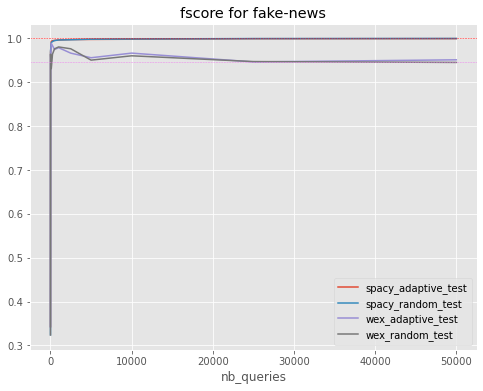

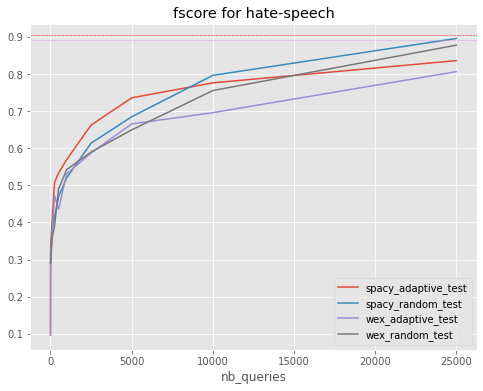

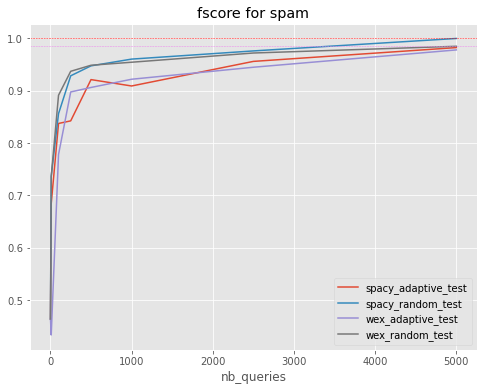

In [9]:
e_set = 'test'
measure = 'fscore'
for use_case in df_eval.dataset.unique().tolist():
    df_uc = df_eval[df_eval.dataset==use_case]
    df_sc = df_uc[df_uc.setting != 'baseline']
    fig, ax = plt.subplots(figsize=(8,6))
    for label, df in df_sc.groupby('model'):
        for s_label, df_s in df.groupby('setting'):
            a=df_s[df_s.set==e_set]
            df_s[df_s.set==e_set].plot(kind='line', ax=ax, x='nb_queries', y=measure, label=label+'_'+s_label+'_test')
    plt.legend()
    baseline_wex = df_uc.query(f"setting=='baseline' and model=='wex' and set=='{e_set}'").drop_duplicates()[measure].to_numpy()
    baseline_spacy = df_uc.query(f"setting=='baseline' and model=='spacy' and set=='{e_set}'").drop_duplicates()[measure].to_numpy()
    plt.axhline(y=baseline_wex, color='violet', linestyle='--', linewidth=.5)
    plt.axhline(y=baseline_spacy, color='red', linestyle='--', linewidth=.5)
    plt.title(measure + ' for ' + use_case)